## Imports

In [1]:
from utils import *
from augment.MultiPartAugmentor import MultiPartAugmentor
from augment.SemanticAugmentor import SemanticAugmentor
from augment.SingleAugmentor import SingleAugmentor

## Load and show input data

In [2]:
data_folder = './data/IPPN_full/'

In [3]:
images_path, masks_path = get_img_mask_list(data_folder)
background_path = get_images_list('./data/background/')

In [4]:
images = [read(f) for f in images_path]
masks = [read(f) for f in masks_path]
background = [read(f) for f in background_path]

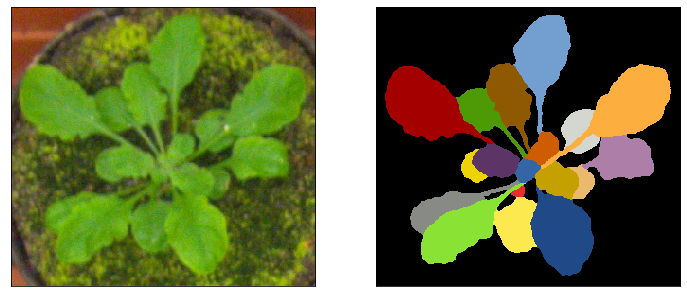

In [5]:
for i in range(len(images)):
    show([images[i], masks[i]])
    break

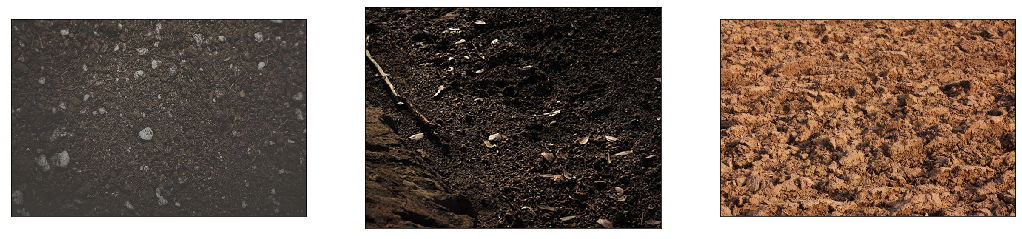

In [6]:
show_line(background[:5], None)

## Multi-Part Augmentor

### Simple example

In [7]:
simple_mpa = MultiPartAugmentor({
    'output_type_list': ['multi-object', 'multi-part'],
    'background': 'img',
    'background_image_list': background
})

In [8]:
simple_mpa_transformed = simple_mpa.transform(images, masks)

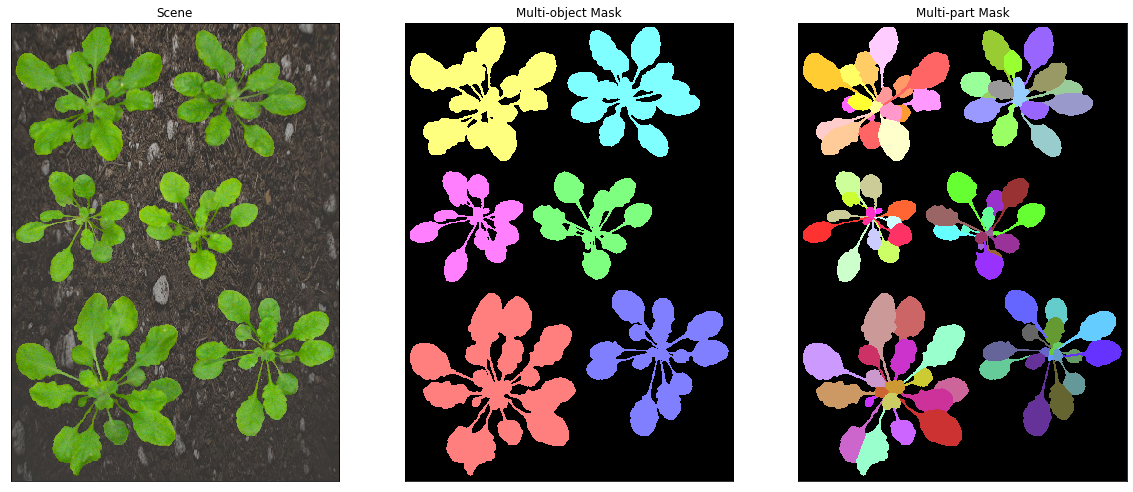

In [9]:
show_transforms(simple_mpa_transformed)

### Setup Augmentor parameters

In [10]:
mpa = MultiPartAugmentor({
    'output_type_list': ['single', 'multi-object', 'multi-part', 'class'],
    'overlap_ratio': 0.3,
    'persp_trans': 0,
    'max_rotate_degree': 90,
    'flip_prob': 0.5,
    'background': 'img',
    'background_image_list': background,
    'salt': 0.01,
    'pepper': 0.01,
    'gauss_var': 0,
    'smooth_kernel_size': 5,
    'bboxes': True,
    'num_classes': 10,
    'adjust_mask': True,
    'pad_mask': 10
})

In [11]:
mpa_transformed = mpa.transform(images, masks, class_list=[0, 0, 1, 1, 1, 2])

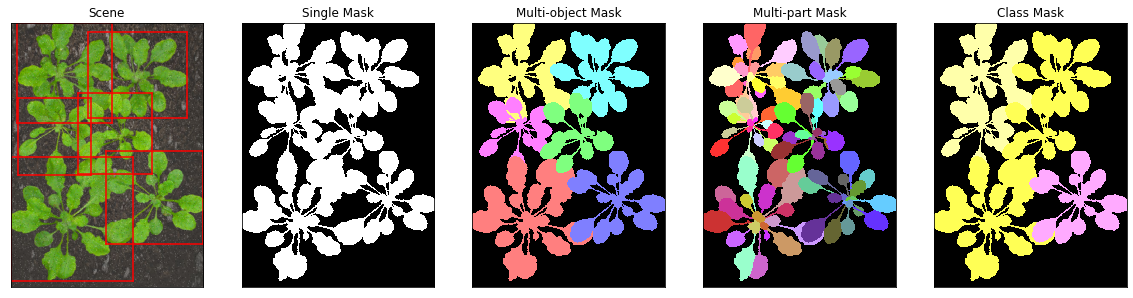

In [12]:
show_transforms(mpa_transformed, show_bbox=True)

## Semantic Augmentor

In [13]:
sema = SemanticAugmentor({
    'output_type_list': ['single', 'multi-object', 'semantic', 'class'],
    'overlap_ratio': 0.3,
    'persp_trans': 0.2,
    'max_rotate_degree': 30,
    'flip_prob': 0.5,
    'background': 'img',
    'background_image_list': background,
    'salt': 0.01,
    'pepper': 0.01,
    'gauss_var': 0,
    'smooth_kernel_size': 5,
    'bboxes': True,
    'num_classes': 10
})

In [14]:
sema_transformed = sema.transform(images, masks, class_list=[0, 0, 10, 1, 1, 2])

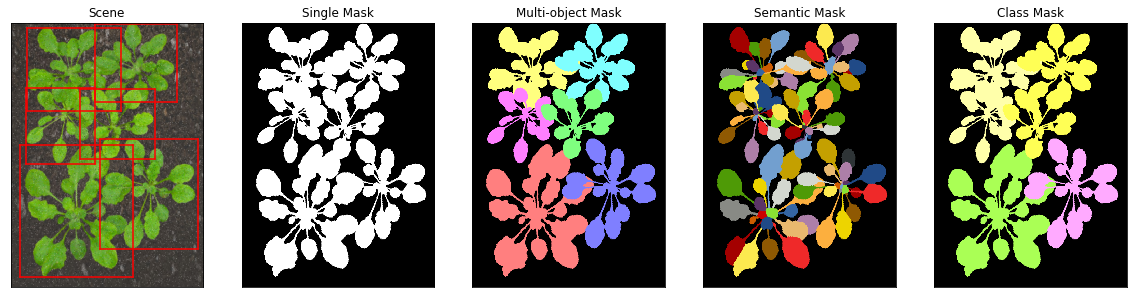

In [15]:
show_transforms(sema_transformed, show_bbox=True)

## Single-channel mask Augmentor

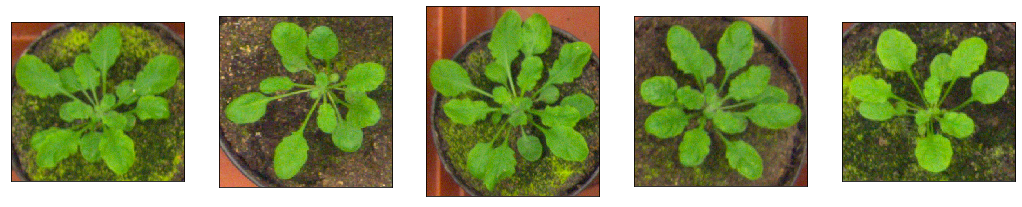

In [16]:
show_line(images[:5])

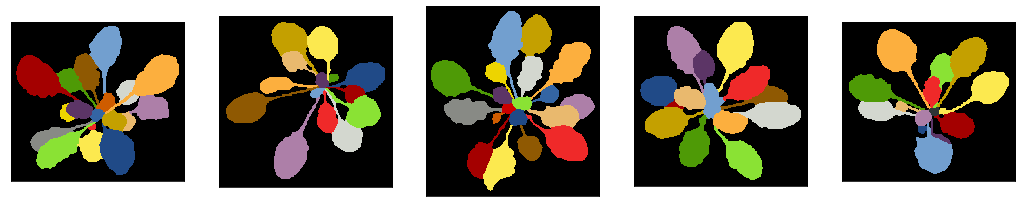

In [17]:
show_line(masks[:5])

### Making single-channel masks artificially

In [18]:
sinle_chan_masks = [color_mask(mask, [255, 255, 255]) for mask in masks]

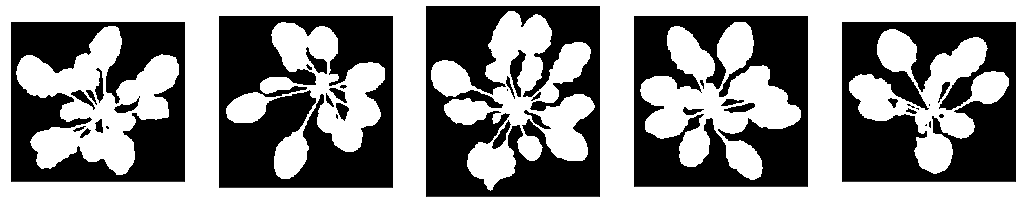

In [19]:
show_line(sinle_chan_masks[:5])

In [20]:
sina = SingleAugmentor({
    'output_type_list': ['single', 'multi-object', 'class'],
    'overlap_ratio': 0.0,
    'persp_trans': 0,
    'max_rotate_degree': 30,
    'flip_prob': 0.5,
    'background': 'img',
    'background_image_list': background,
    'salt': 0.01,
    'pepper': 0.01,
    'gauss_var': 0,
    'smooth_kernel_size': 5,
    'bboxes': True,
    'num_classes': 10
})

In [21]:
single_transformed = sina.transform(images, sinle_chan_masks, class_list=[0, 0, 10, 1, 1, 2])

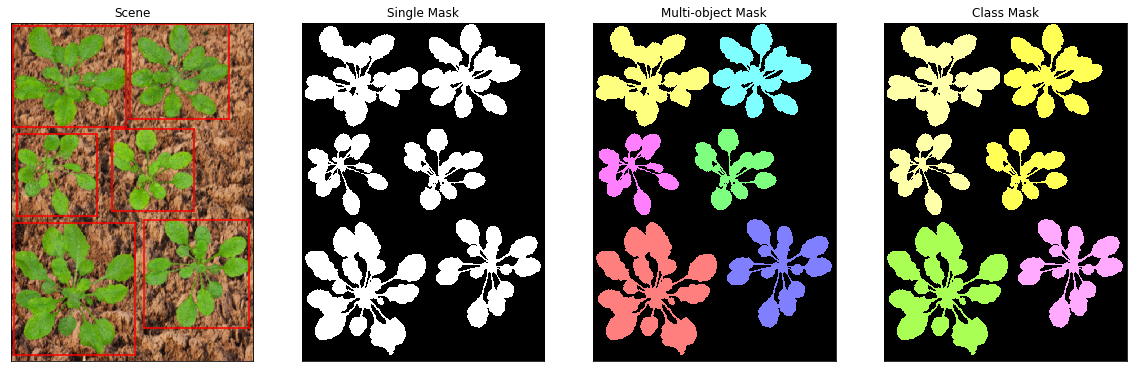

In [22]:
show_transforms(single_transformed, show_bbox=True)

## Measure time

### Complex MPA

In [23]:
mpa_transformed['scene'].shape

(777, 565, 3)

In [24]:
%%time

for i in range(100):
    _ = mpa.transform(images, masks, class_list=[0, 0, 1, 1, 1, 2])

CPU times: user 1min 10s, sys: 36.2 ms, total: 1min 10s
Wall time: 1min 9s


~ 0.7s per scene for 777x565x3 final scene; 6 input objects; 4 types of output masks + bounding boxes

In [25]:
simple_sema = SemanticAugmentor({
    'output_type_list': ['semantic'],
    'background': 'img',
    'background_image_list': background,
})

### Simple Semantic

In [26]:
sema_transformed['scene'].shape

(777, 565, 3)

In [27]:
%%time

for i in range(1000):
    _ = simple_sema.transform(images, masks)

CPU times: user 50.3 s, sys: 155 ms, total: 50.5 s
Wall time: 43.9 s


~ 0.05s per scene for 777x565x3 final scene; 6 input objects; 1 type of output masks